<a href="https://colab.research.google.com/github/FatimaShenno/ML-Project/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](logo1.jpg)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")


# Get the Data

Read train.csv as a dataframe

In [ ]:
dataset = pd.read_csv('/content/train.csv')

Use data to create dataframe called diamond_data

In [ ]:
diamond_data = pd.DataFrame(dataset)

# Data Discovery

Discovering the top five rows using the DataFrame’s head() method




In [ ]:
top_five_rows = diamond_data.head(5)
top_five_rows

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


Use the info() method to get description of the data

In [ ]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
diamond_data = diamond_data.drop('Unnamed: 0', axis=1)

Create a Series that displays the total count of missing values per column

In [ ]:
diamond_data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
diamond_data["cut"].value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

In [ ]:
diamond_data["color"].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

In [ ]:
diamond_data["clarity"].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

Summary of the numerical attributes. Using the describe() method

In [ ]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Data Visualization

Create a hist plot for diamond dataframe

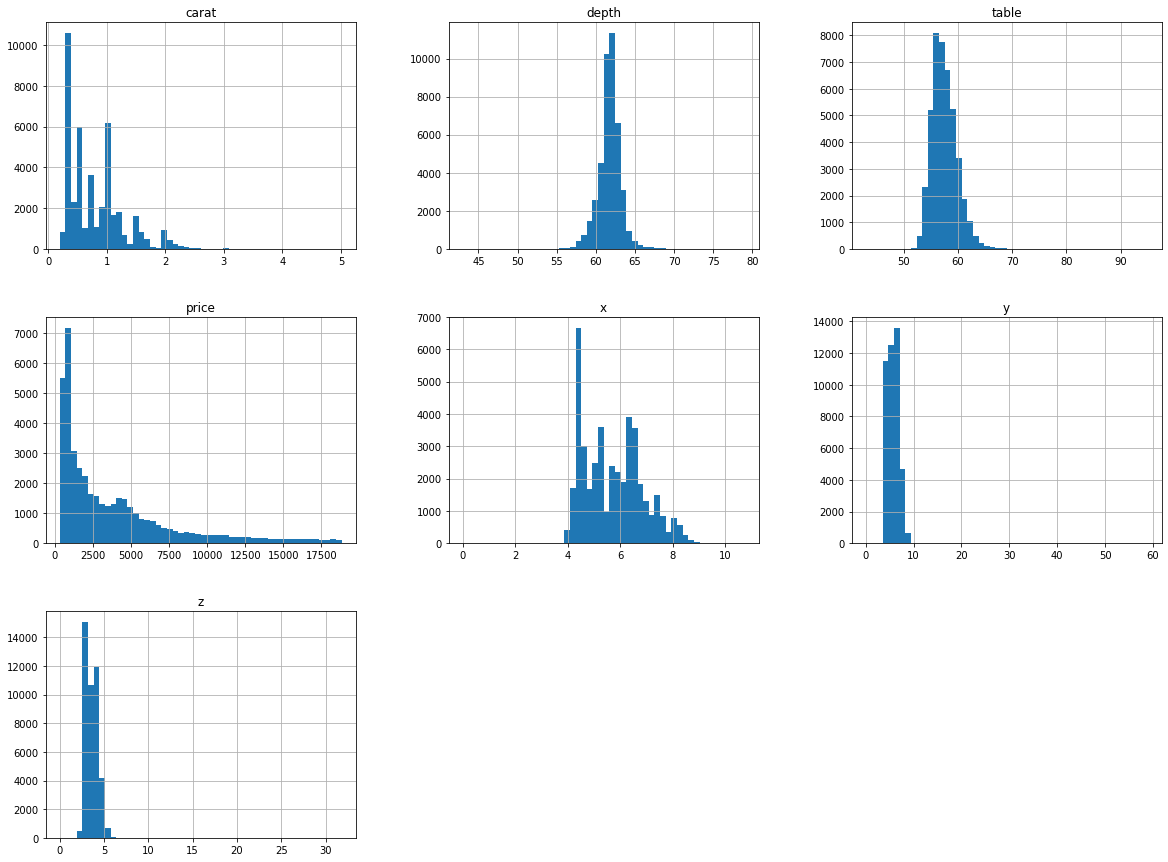

In [ ]:
diamond_data.hist(bins = 50, figsize = (20, 15))
plt.show()

Explore correlation between all continuous numeric variables using .corr() method

In [ ]:
diamond_data_corr= diamond_data.corr()
diamond_data_corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.022599,0.191260,0.923801,0.974368,0.946001,0.948625
depth,0.022599,1.000000,-0.292084,-0.014393,-0.031088,-0.034945,0.088335
table,0.191260,-0.292084,1.000000,0.136975,0.204768,0.191469,0.159775
price,0.923801,-0.014393,0.136975,1.000000,0.887483,0.863748,0.860625
x,0.974368,-0.031088,0.204768,0.887483,1.000000,0.969541,0.966909
y,0.946001,-0.034945,0.191469,0.863748,0.969541,1.000000,0.944215
z,0.948625,0.088335,0.159775,0.860625,0.966909,0.944215,1.000000


Using seaborn method to convert the correlation matrix to a heatmap plot

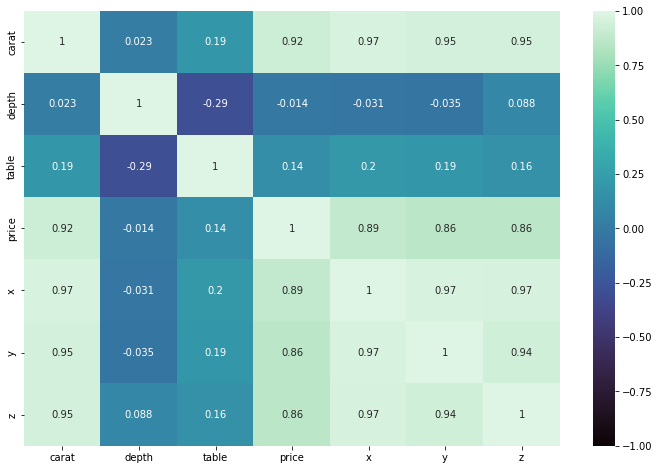

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(diamond_data_corr, vmin=-1, vmax=1, annot=True, cmap= 'mako')

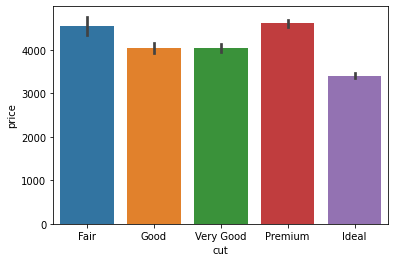

In [ ]:
sns.barplot(x='cut', y='price', order=['Fair','Good','Very Good','Premium','Ideal'], data=diamond_data)

In [ ]:
diamond_data['carat'].loc[np.where((diamond_data['cut'] == 'Premium') | (diamond_data['cut'] == 'Ideal'))].count()

28455

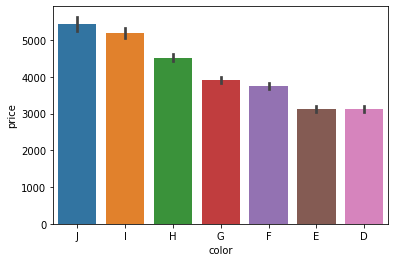

In [ ]:
sns.barplot(x='color', y='price', order=['J','I','H','G','F','E','D'], data=diamond_data)

In [ ]:
print('Average Price of Color J : ', diamond_data['price'].loc[np.where(diamond_data['color'] == 'J')].mean())
print('Average Price of Color D : ', diamond_data['price'].loc[np.where(diamond_data['color'] == 'D')].mean())

Average Price of Color J :  5433.154192966636
Average Price of Color D :  3128.875067506751


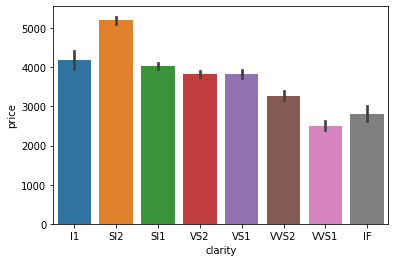

In [ ]:
sns.barplot(x='clarity', y='price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=diamond_data)

In [ ]:
print('Average Price of Clatity SI2 : ', diamond_data['price'].loc[np.where(diamond_data['clarity'] == 'SI2')].mean())
print('Average Price of Clatity IF : ', diamond_data['price'].loc[np.where(diamond_data['clarity'] == 'IF')].mean())

Average Price of Clatity SI2 :  5196.133739837398
Average Price of Clatity IF :  2809.335805799056


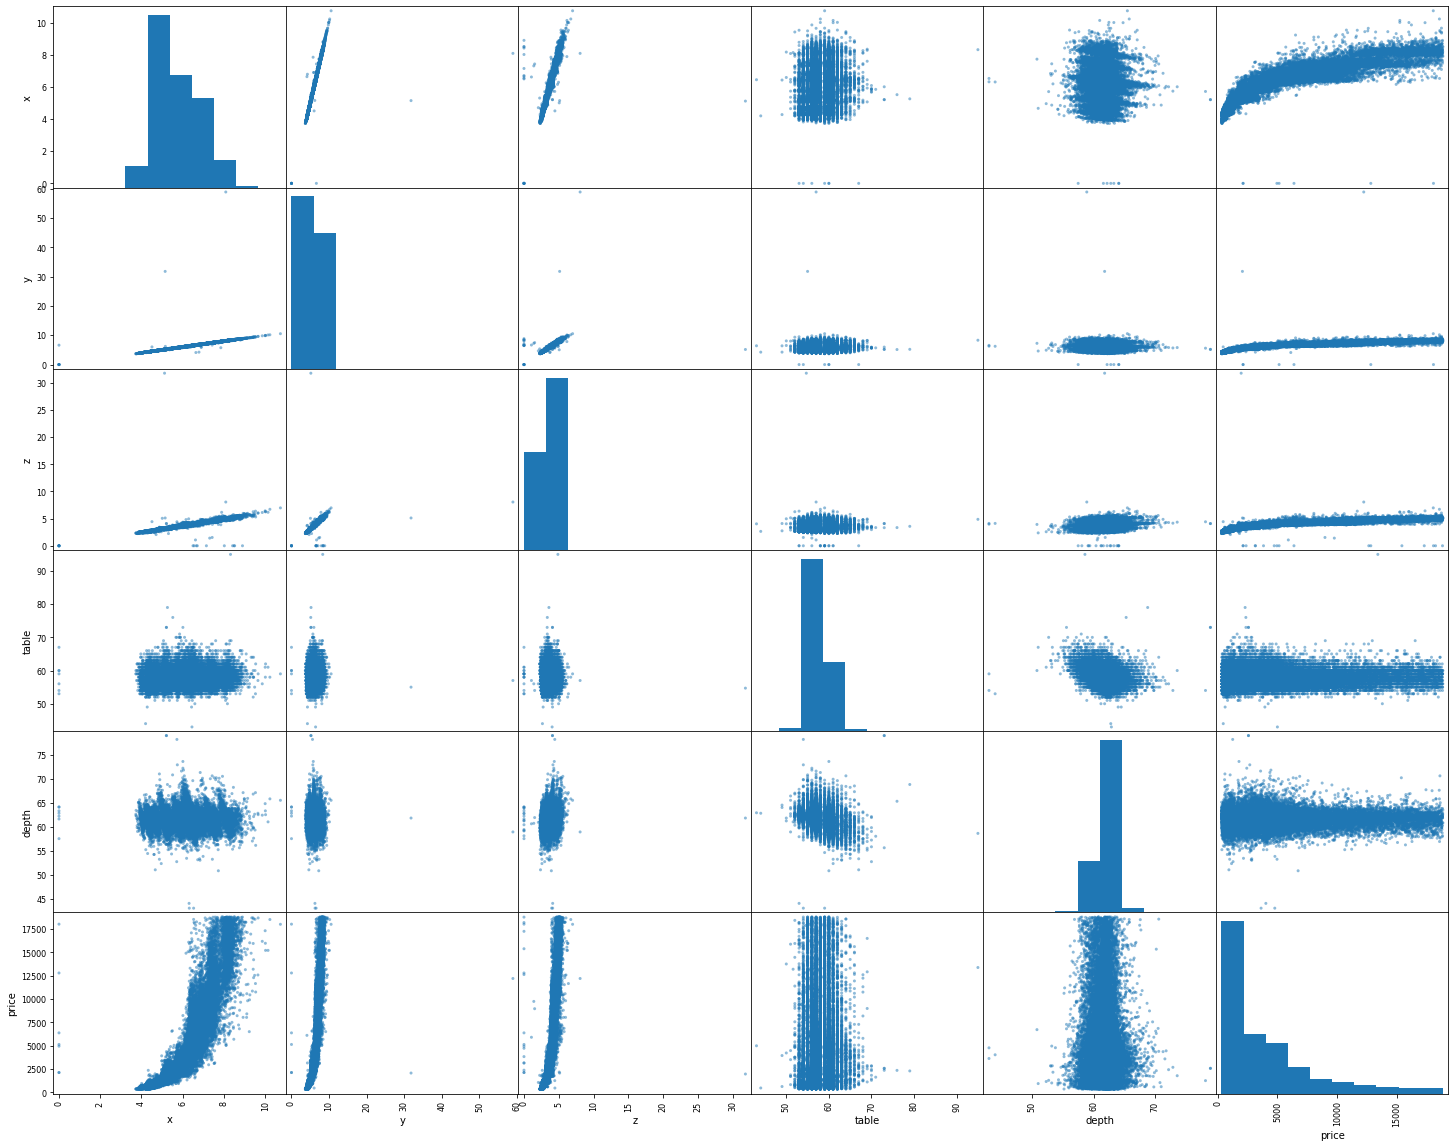

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["x", "y", "z", "table", "depth", "price"]
scatter_matrix(diamond_data[attributes], figsize=(25, 20))
plt.show()

In [ ]:
data= diamond_data.copy()

# Prepare the Data

**Set Explanatory variable (diamonds), Response variable diamonds_labels (Price)**

In [ ]:
diamonds = data.drop("price", axis=1)
diamonds_labels = data["price"].copy()

**Get numerical attributes**

Drop all the category, so we could have only numeric

In [ ]:
diamonds_num = diamonds.drop(["cut", "color", "clarity"], axis=1)

**Handling Categorical Attributes**

In [ ]:
diamonds_cat = diamonds[["cut", "color", "clarity"]]
diamonds_cat.head()

,cut,color,clarity
0,Premium,E,SI1
1,Premium,I,VS2
2,Good,J,SI2
3,Very Good,J,VVS2
4,Very Good,I,VVS1


**Transformation Pipelines**

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(diamonds_num)
cat_attribs = ["cut", "color", "clarity"]

pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [ ]:
diamond_prepared= pipeline.fit_transform(diamonds)

pd.DataFrame(diamond_prepared).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-1.219160,-1.355937,1.589369,-1.619783,-1.628215,-1.713517,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.052995,0.455620,0.250185,-1.346048,-1.291900,-1.265673,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.011454,1.082698,0.250185,-1.222426,-1.188418,-1.097731,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.156848,0.734321,-0.196209,-1.575632,-1.524733,-1.475600,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.156848,0.385945,-0.196209,-1.566802,-1.507486,-1.489595,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Select and Train Model

**Linear Regression** 

In [ ]:
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(diamond_prepared, diamonds_labels)

y_pred1 = l_reg.predict(diamond_prepared)

l_reg_mse = mean_squared_error(diamonds_labels, y_pred1)
l_reg_rmse = np.sqrt( l_reg_mse)
l_reg_rmse

1132.3793080113244

Evaluation Using Cross-Validation

In [ ]:
scores = cross_val_score(l_reg, diamond_prepared, diamonds_labels,
                       scoring="neg_mean_squared_error", cv=10)
l_reg_rmse_score = np.sqrt(-scores)
l_reg_rmse_score

array([ 910.30486164,  821.68475128,  927.16578425, 1279.79350481,
       2507.59904519, 1783.61488778,  707.23712138,  773.1640223 ,
        711.31620283,  781.36405582])

**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

d_tree = DecisionTreeRegressor()
d_tree.fit(diamond_prepared, diamonds_labels)

y_pred2 = d_tree.predict(diamond_prepared)

d_tree_mse = mean_squared_error(diamonds_labels, y_pred2)
d_tree_rmse = np.sqrt(d_tree_mse)
d_tree_rmse

9.550703771663994

Evaluation Using Cross-Validation

In [ ]:
scores = cross_val_score(d_tree, diamond_prepared, diamonds_labels,
                       scoring="neg_mean_squared_error", cv=10)
d_tree_rmse_score = np.sqrt(-scores)
d_tree_rmse_score

array([ 674.45009186,  800.1947384 , 1030.27301795, 1710.57515209,
       3232.78180229, 1353.4780175 ,  173.53015597,  246.2577305 ,
        334.39395492,  541.62895076])

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

f_reg = RandomForestRegressor(n_estimators=100, random_state=42)
f_reg.fit(diamond_prepared, diamonds_labels)

y_pred2 = f_reg.predict(diamond_prepared)

f_reg_mse = mean_squared_error(diamonds_labels, y_pred2)
f_reg_rmse = np.sqrt(f_reg_mse)
f_reg_rmse

208.55987691514437

Evaluation Using Cross-Validation

In [ ]:
scores = cross_val_score(f_reg, diamond_prepared, diamonds_labels,
                       scoring="neg_mean_squared_error", cv=10)
f_reg_rmse_score = np.sqrt(-scores)
f_reg_rmse_score

array([ 518.14958593,  570.43207856,  801.83300456, 1263.88969681,
       2350.14739189, 1272.81630045,  142.1716906 ,  202.21713281,
        255.31516569,  400.53027765])

**XGBoost (eXtreme Gradient Boosting)**

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(diamond_prepared, diamonds_labels)

y_pred2 = xgb.predict(diamond_prepared)

xgb_mse = mean_squared_error(diamonds_labels, y_pred2)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

[11:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


719.8210314027024

Evaluation Using Cross-Validation

In [ ]:
scores = cross_val_score(xgb, diamond_prepared, diamonds_labels,
                       scoring="neg_mean_squared_error", cv=10)
xgb_rmse_score = np.sqrt(-scores)
xgb_rmse_score

[11:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:47:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([ 536.75804846,  656.78943752,  884.60916064, 1468.14472698,
       2455.54290943, 1543.71017023,  175.41336591,  225.30842505,
        256.88235209,  410.81394225])

# Test Model


**Get the Data**

In [ ]:
test_data = pd.read_csv('/content/test.csv')
x_testData = test_data.drop('Unnamed: 0', axis=1)
testData_prepared = pipeline.transform(x_testData)

**Setup test predictions**

In [ ]:
y_pred_test = d_tree.predict(testData_prepared)
y_pred_test

array([ 430.77,  414.41,  408.76, ..., 2883.12, 2903.62, 2663.88])

In [ ]:
submission = test_data[["Unnamed: 0"]]

In [ ]:
submission["price"] = y_pred_test

In [ ]:
submission

,Unnamed: 0,price
0,1,430.77
1,3,414.41
2,8,408.76
3,10,397.46
4,12,456.66
...,...,...
10895,53922,2762.53
10896,53923,2878.95
10897,53933,2883.12
10898,53934,2903.62


In [ ]:
submission.to_csv("submission.csv", index= None)